In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import os
import pandas as pd

# Download the dataset
path = r"/Users/nirjalagurung/IEEE-CIS-Fraud-Detection"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file
csv_path = os.path.join(path, "fraudTrain_processed.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Files in dataset directory: ['FraudDetectors4.ipynb', 'FraudDetectors-sumeya.ipynb', 'FraudDetector4&5.ipynb', 'fraudTrain_processed.csv', 'FraudDetectors.ipynb', 'testing.ipynb', 'ReadME', 'fraudTrain.csv', '.git', 'FraudDetector2-Sumeya.ipynb', 'fraudTest.csv']
             cc_num  category     amt  street  city    zip      lat      long  \
0  2703186189652095         8    4.97     568   526  28654  36.0788  -81.1781   
1      630423337322         4  107.23     435   612  99160  48.8878 -118.2105   
2    38859492057661         0  220.11     602   468  83252  42.1808 -112.2620   
3  3534093764340240         2   45.00     930    84  59632  46.2306 -112.1138   
4   375534208663984         9   41.96     418   216  24433  38.4207  -79.4629   

   city_pop  merch_lat  merch_long  is_fraud  
0      3495  36.011293  -82.048315         0  
1       149  49.159047 -118.186462         0  
2      4154  43.150704 -112.154481         0  
3      1939  47.034331 -112.561071         0  
4        99  3

In [ ]:
# change this to your path for your fraud train procssed file 
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/sumeyahussein/Desktop/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

csv_path = os.path.join(path, "fraudprocessed.csv.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [24]:
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

print("\nUpdated Data Types:\n", df.dtypes)


Updated Data Types:
 cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
is_fraud       int64
dtype: object


In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print(X_train.dtypes)
print(X_test.dtypes)

#make sure its only oject and int

Training set size: (1037340, 11)
Test set size: (259335, 11)
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object
cc_num         int64
category       int64
amt           object
street         int64
city           int64
zip            int64
lat           object
long          object
city_pop       int64
merch_lat     object
merch_long    object
dtype: object


In [30]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#  applying SMOTE to balance the dataset
#  generate synthetic samples and balance the dataset for unbalanced classification problems
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training Decision Tree model with class_weight='balanced' becuase our dataset is unbalanced
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

# calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_dt)  # Calculate AUC


# evaluation and printing statment 
print("Decision Tree:\n")

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1 Score:", f1)
print("Decision Tree AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree:

Decision Tree Accuracy: 0.972070873580504
Decision Tree Precision: 0.9936982473943621
Decision Tree Recall: 0.972070873580504
Decision Tree F1 Score: 0.9814441656897447
Decision Tree AUC: 0.878367476117616

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.15      0.78      0.25      1520

    accuracy                           0.97    259335
   macro avg       0.57      0.88      0.62    259335
weighted avg       0.99      0.97      0.98    259335

Confusion Matrix:
 [[250901   6914]
 [   329   1191]]


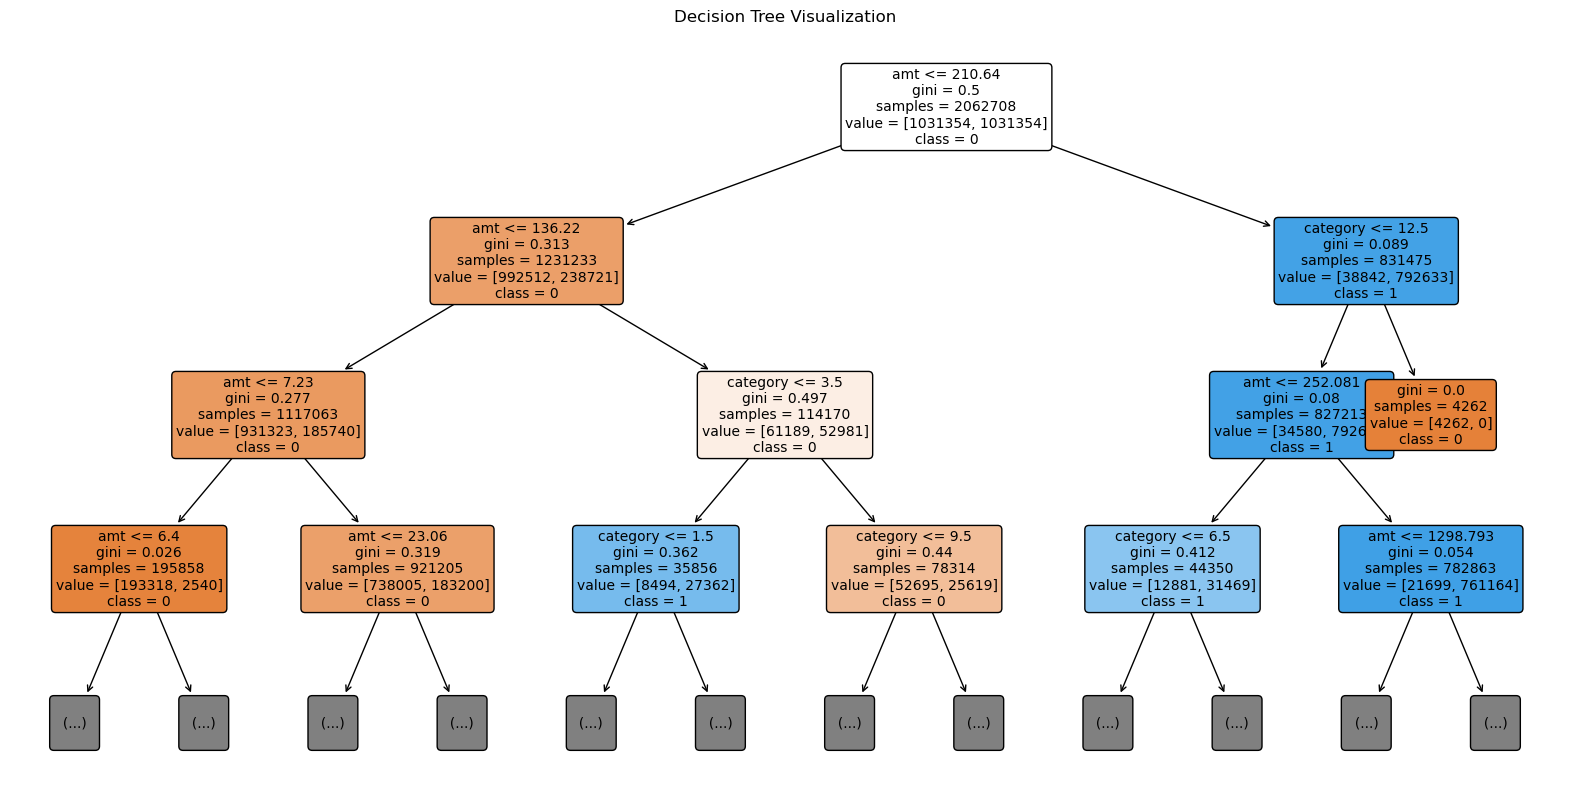

In [27]:
# add visulizations 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# visualization plot
plt.figure(figsize=(20, 10))  # Set figure size for clarity
plot_tree(
    dt_model,
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,  
    rounded=True,  
    fontsize=10, 
    max_depth=3 # Limiting the depth for better readability 
)
plt.title("Decision Tree Visualization")
plt.show()

In [29]:
# K-Nearest
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Apply SMOTE to balance the dataset
# generate synthetic samples and balance the dataset for unbalanced classification problems
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_balanced, y_train_balanced)

# making predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class

# Calculating all metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_knn)  # Calculating  AUC

# Evaluation and printing 
print("K-Nearest:\n")

print("K-Nearest Accuracy:", accuracy)
print("K-Nearest Precision:", precision)
print("K-Nearest Recall:", recall)
print("K-Nearest F1 Score:", f1)
print("K-Nearest AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest:

K-Nearest Accuracy: 0.9349914203636224
K-Nearest Precision: 0.9934073454182392
K-Nearest Recall: 0.9349914203636224
K-Nearest F1 Score: 0.9613263754150937
K-Nearest AUC: 0.9026951955553605

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    257815
           1       0.07      0.82      0.13      1520

    accuracy                           0.93    259335
   macro avg       0.53      0.88      0.55    259335
weighted avg       0.99      0.93      0.96    259335

Confusion Matrix:
 [[241233  16582]
 [   277   1243]]


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Scaling the data for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
# using class_weight='balanced' beucase our dataset is unbalanced 
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_lr)  # Calculating the AUC

# Printing  metrics
print("Logistic Regression:\n")

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1 Score:", f1)
print("Logistic Regression AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression:

Logistic Regression Accuracy: 0.9488807912545549
Logistic Regression Precision: 0.9932555730090007
Logistic Regression Recall: 0.9488807912545549
Logistic Regression F1 Score: 0.9688264801180242
Logistic Regression AUC: 0.861451581458349

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    257815
           1       0.08      0.78      0.15      1520

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335

Confusion Matrix:
 [[244897  12918]
 [   339   1181]]


In [32]:
# Naive Bayes​
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Applying SMOTE to balance the dataset
# generate synthetic samples and balance the dataset for unbalanced classification problems

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)

# making predictions
y_pred_nb = nb_model.predict(X_test)

# Calculating  metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')
auc = roc_auc_score(y_test, y_pred_nb)  # Calculate AUC

# Evaluation
print("Naive Bayes:​\n")

print("Naive Bayes​ Accuracy:", accuracy)
print("Naive Bayes​ Precision:", precision)
print("Naive Bayes​ Recall:", recall)
print("Naive Bayes​ F1 Score:", f1)
print("Naive Bayes AUC:", auc)

print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes:​

Naive Bayes​ Accuracy: 0.9631557637804384
Naive Bayes​ Precision: 0.9923738676322765
Naive Bayes​ Recall: 0.9631557637804384
Naive Bayes​ F1 Score: 0.9763738917152197
Naive Bayes AUC: 0.7911506185075589

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    257815
           1       0.09      0.62      0.16      1520

    accuracy                           0.96    259335
   macro avg       0.55      0.79      0.57    259335
weighted avg       0.99      0.96      0.98    259335

Confusion Matrix:
 [[248842   8973]
 [   582    938]]


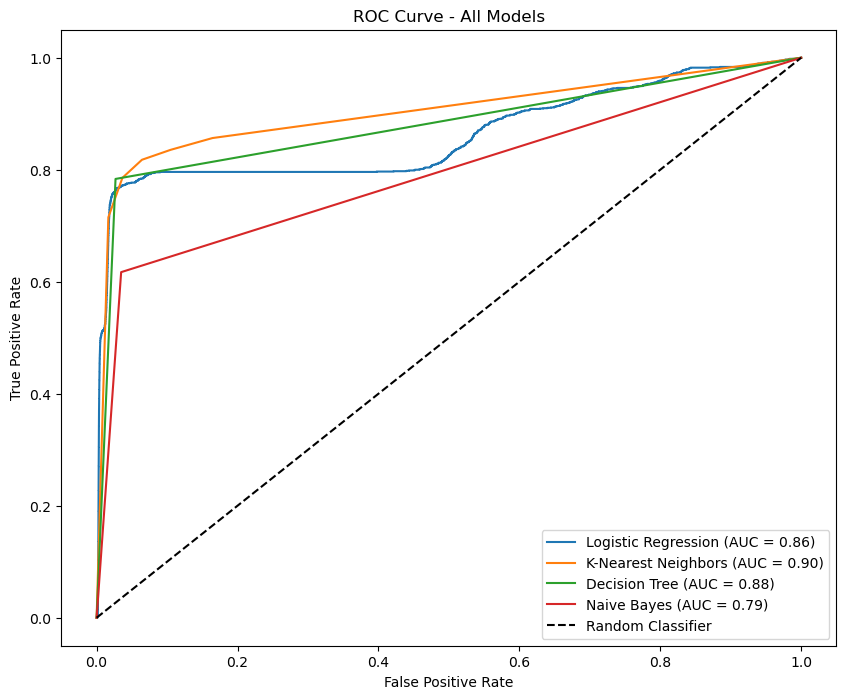

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# initializing the plot for the ROC curve
plt.figure(figsize=(10, 8))

# models to compare 
models = [
    ("Logistic Regression", lr_model, y_pred_proba_lr),
    ("K-Nearest Neighbors", knn_model, y_pred_proba_knn),
    ("Decision Tree", dt_model, y_pred_proba_dt),
    ("Naive Bayes", nb_model, y_pred_nb)
]

# Plot ROC curve for each model
for model_name, model, y_pred_proba in models:
    #  ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    #  AUC
    roc_auc = auc(fpr, tpr)
    
    # Ploting ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

#  random classifier 0.5
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Adding  labels and showing 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - All Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()

We recommened k-nearest neigbor becuase the auc is the highest for this model, lookign only at accuracy may cause issues as our dataset is unbalanced. To combat the unbalanced dataset we used SMOTE- to balance our data and class_weight='balanced'

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20]
}

# Grid search
grid_search_dt = GridSearchCV(dt, dt_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Best model from grid search
best_dt_model = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_

# Perform cross-validation using the best dt model
dt_scores = cross_val_score(best_dt_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Output the results
print(f"Best Parameters for Decision Tree: {best_dt_params}")
print("Decision Tree cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Decision Tree cross-validation scores: [0.91567694 0.91593764 0.91408841 0.91535438 0.9144164 ]
Mean cross-validation score: 0.9150947555856366


In [52]:
from sklearn.metrics import classification_report, roc_auc_score

# Best model from grid search
best_dt_model = grid_search_dt.best_estimator_

# Predictions
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Probabilities for AUC
y_train_proba = best_dt_model.predict_proba(X_train)[:, 1]
y_test_proba = best_dt_model.predict_proba(X_test)[:, 1]

# Metrics
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Additional metrics if needed
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nAdditional Metrics (Test):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Train AUC: 0.9695874175709958
Test AUC: 0.9616789574369251

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    257834
           1       0.10      0.87      0.19      1501

    accuracy                           0.96    259335
   macro avg       0.55      0.91      0.58    259335
weighted avg       0.99      0.96      0.97    259335


Additional Metrics (Test):
Accuracy: 0.9557946285692251
Precision: 0.9940451118872525
Recall: 0.9557946285692251
F1 Score: 0.9727007024953375


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [5, 10, 15, 20, 30, 40],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2] 
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search_knn.fit(X_train_balanced, y_train_balanced)

# Get the best estimator and parameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# Perform cross-validation using the best KNN model
knn_scores = cross_val_score(best_knn_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Output the results
print(f"Best Parameters for K-Nearest Neighbors: {best_knn_params}")
print("KNN cross-validation scores:", knn_scores)
print("Mean cross-validation score:", np.mean(knn_scores))

Best Parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
KNN cross-validation scores: [0.95963654 0.95955909 0.95972236 0.95922853 0.95889739]
Mean cross-validation score: 0.9594087800996087


In [59]:
from sklearn.metrics import classification_report, roc_auc_score

# Best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Predictions
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Probabilities for AUC
y_train_proba = best_knn_model.predict_proba(X_train)[:, 1]
y_test_proba = best_knn_model.predict_proba(X_test)[:, 1]

# Metrics
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Additional metrics if needed
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nAdditional Metrics (Test):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Train AUC: 1.0
Test AUC: 0.9013971474356577

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    257834
           1       0.07      0.80      0.14      1501

    accuracy                           0.94    259335
   macro avg       0.54      0.87      0.55    259335
weighted avg       0.99      0.94      0.96    259335


Additional Metrics (Test):
Accuracy: 0.9410993502612451
Precision: 0.993419608806811
Recall: 0.9410993502612451


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', max_iter=5000, penalty='l2', class_weight='balanced')

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1],              # Narrower range for C
    'tol': [1e-4, 1e-3],               # Focused tolerance values
    'solver': ['liblinear', 'saga'],   # Two solvers instead of three
    'max_iter': [500, 1000],           # Fewer iterations
    'class_weight': ['balanced']       # Keeping balanced for class weighting
}

# Perform GridSearchCV
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best estimator and parameters
best_lr_model = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_

# Perform cross-validation using the best Logistic Regression model
lr_scores = cross_val_score(best_lr_model, X_train_scaled, y_train, cv=5, scoring='f1')

# Output the results
print(f"Best Parameters for Logistic Regression: {best_lr_params}")
print("Logistic Regression cross-validation scores:", lr_scores)
print("Mean cross-validation score:", np.mean(lr_scores))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'saga', 'tol': 0.001}
Logistic Regression cross-validation scores: [0.14999586 0.14750788 0.15047022 0.14770907 0.14750648]
Mean cross-validation score: 0.1486378992872574


In [68]:
from sklearn.metrics import classification_report, roc_auc_score

# Best model from grid search
best_lr_model = grid_search_dt.best_estimator_

# Predictions
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Probabilities for AUC
y_train_proba = best_lr_model.predict_proba(X_train)[:, 1]
y_test_proba = best_lr_model.predict_proba(X_test)[:, 1]

# Metrics
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Additional metrics if needed
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nAdditional Metrics (Test):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Train AUC: 0.9695874175709958
Test AUC: 0.9616789574369251

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    257834
           1       0.10      0.87      0.19      1501

    accuracy                           0.96    259335
   macro avg       0.55      0.91      0.58    259335
weighted avg       0.99      0.96      0.97    259335


Additional Metrics (Test):
Accuracy: 0.9557946285692251
Precision: 0.9940451118872525
Recall: 0.9557946285692251
F1 Score: 0.9727007024953375


In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE

#Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Variance smoothing values
}

# Perform GridSearchCV
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search_nb.fit(X_train_balanced, y_train_balanced)

# Get the best estimator and parameters
best_nb_model = grid_search_nb.best_estimator_
best_nb_params = grid_search_nb.best_params_

# Perform cross-validation using the best Naive Bayes model
nb_scores = cross_val_score(best_nb_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# Output the results
print(f"Best Parameters for Naive Bayes: {best_nb_params}")
print("Naive Bayes cross-validation scores:", nb_scores)
print("Mean cross-validation score:", np.mean(nb_scores))

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Naive Bayes cross-validation scores: [0.64769071 0.64702809 0.64726924 0.64743963 0.64757983]
Mean cross-validation score: 0.6474015001043922


In [70]:
from sklearn.metrics import classification_report, roc_auc_score

# Best model from grid search
best_nb_model = grid_search_nb.best_estimator_

# Predictions
y_train_pred = best_nb_model.predict(X_train)
y_test_pred = best_nb_model.predict(X_test)

# Probabilities for AUC
y_train_proba = best_nb_model.predict_proba(X_train)[:, 1]
y_test_proba = best_nb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# Additional metrics if needed
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nAdditional Metrics (Test):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Train AUC: 0.5077554855246973
Test AUC: 0.49520253199181496

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.09      0.17    257834
           1       0.01      0.90      0.01      1501

    accuracy                           0.10    259335
   macro avg       0.50      0.50      0.09    259335
weighted avg       0.99      0.10      0.17    259335


Additional Metrics (Test):
Accuracy: 0.09764204600227505
Precision: 0.9881441807552002
Recall: 0.09764204600227505
F1 Score: 0.1691045439300429


                     Decision Tree       KNN  Logistic Regression  Naive Bayes
Decision Tree             1.000000  0.283614             1.000000     0.004088
KNN                       0.283614  1.000000             0.283614     0.018253
Logistic Regression       1.000000  0.283614             1.000000     0.004088
Naive Bayes               0.004088  0.018253             0.004088     1.000000


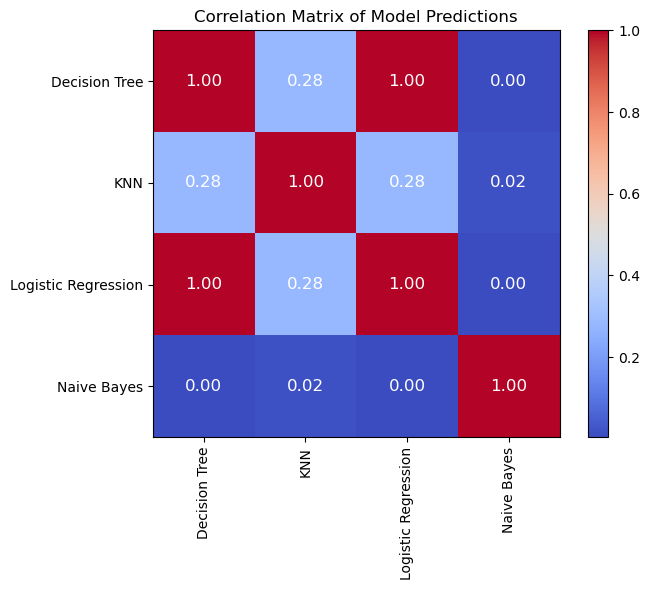

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get predictions from each model
dt_preds = best_dt_model.predict(X_test)
knn_preds = best_knn_model.predict(X_test)
lr_preds = best_lr_model.predict(X_test)
nb_preds = best_nb_model.predict(X_test)

# Create a DataFrame with the predictions
predictions = pd.DataFrame({
    'Decision Tree': dt_preds,
    'KNN': knn_preds,
    'Logistic Regression': lr_preds,
    'Naive Bayes': nb_preds
})

# Calculate the correlation matrix of model predictions
correlation_matrix = predictions.corr()

# Display the correlation matrix in the exact format
print(correlation_matrix)

# Create the figure and axes for plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Change color using cmap
cp = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add title to the plot
ax.set_title('Correlation Matrix of Model Predictions')

# Annotate the values inside the correlation plot
for (i, j), z in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{z:0.2f}', ha='center', va='center', color='white', fontsize=12)  # Adjust color and size as needed

# Set feature names (column names) as tick labels
feature_names = correlation_matrix.columns

# Set ticks and labels
ax.set_xticks(np.arange(len(feature_names)))  # Set the number of ticks equal to the number of features
ax.set_yticks(np.arange(len(feature_names)))

# Assign feature names as tick labels
ax.set_xticklabels(feature_names, rotation=90, fontsize=10)  # Rotate x labels for readability
ax.set_yticklabels(feature_names, fontsize=10)

# Move the x-axis labels to the bottom
ax.xaxis.set_ticks_position('bottom')  # Set the x-ticks to be at the bottom
ax.xaxis.set_label_position('bottom')  # Ensure the label is also positioned at the bottom

# Add a colorbar
fig.colorbar(cp, ax=ax, fraction=0.046, pad=0.04)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

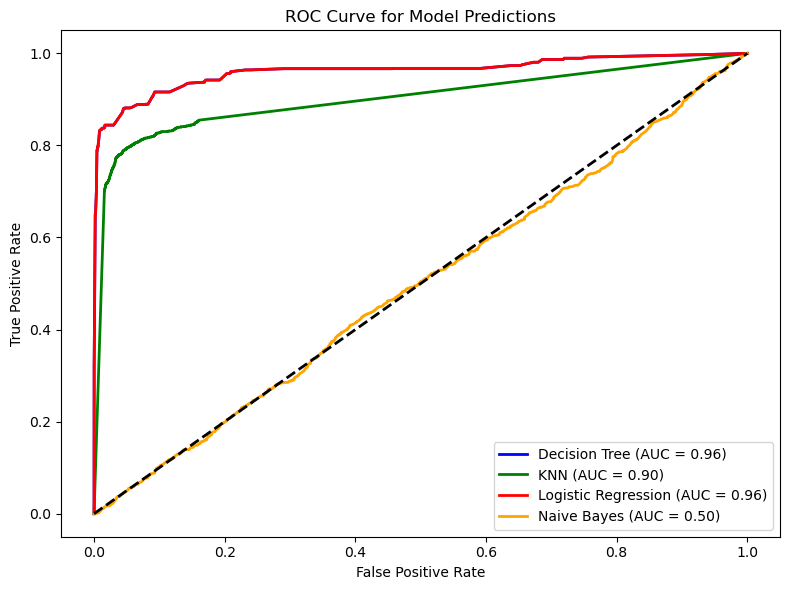

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1) for each model
dt_probs = best_dt_model.predict_proba(X_test)[:, 1]
knn_probs = best_knn_model.predict_proba(X_test)[:, 1]
lr_probs = best_lr_model.predict_proba(X_test)[:, 1]
nb_probs = best_nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Calculate AUC for each model
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))

plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Customize the plot
plt.title('ROC Curve for Model Predictions')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

After optimization we would recommend either Decision Trees or Logistic Regression because it was the highest AUC. 

